<a href="https://colab.research.google.com/github/Dowgue/Praticas_Python/blob/main/Resolu%C3%A7oes_de_Exercicios/Aula8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercícios: 
   1. Percorra toda a `string` "banana", utilizando as iterações
apresentadas nas aulas anteriores, e imprima na tela uma letra por linha como se fosse em uma escada. 
   1. Escreva uma função que receba uma `string` como argumento e exiba as letras de trás para a frente, uma por linha.


In [1]:
# Exercício 1
fruta = 'banana'

for i in range(len(fruta)):
    print(" "*i, fruta[i])

 b
  a
   n
    a
     n
      a


In [2]:
# Exercício 2

def invert_text(text):
    for i in range(len(text), 0, -1):
        print(text[i-1])

invert_text("banana")

a
n
a
n
a
b


## Exercícios

   1. Resolução numérica de equações diferenciais. Imagine que tem um/a maratonista treinando, que num trecho de $5 \mathrm{km}$ tem velocidade quase constante de $12 \mathrm{km/h}$. Produza uma lista com a  distância percorrida em intervalos de 1 minuto. 

   1. O/A mesmo/a atleta no seguinte trecho acelera nos seguintes $200$ metros até chegar numa velocidade de $15 \mathrm{km/h}$, e mantém esta velocidade por $1,8 \mathrm{km}$. Queremos obter uma tabela ou gráfico da distância percorrida en função do tempo, e calcular e o tempo total para chegar em $7 \mathrm{km}$, faça isto utilizando listas. 

   1. Considere um péndulo simples num plano. O comprimento da linha é $1$ metro, a massa é $0,2 \mathrm{kg}$ e a aceleração de gravidade $9,8 \mathrm{m}/\mathrm{s}^2$. Faça um gráfico ou crie uma tabela para a posição da massa em coordenadas cartesianas em função do tempo, utilizando listas.

   1. (opcional) Pesquise sobre o pacote `numpy` e os objetos desse pacote chamados `array`, tente utilizálos ao invés de listas para resolver os exercícios.

Dica: podem usar o pacote `matplotlib.pyplot` para fazer um gráfico:

Text(0, 0.5, 'distância [m]')

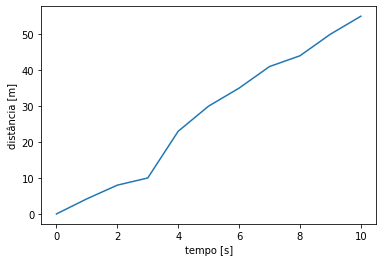

In [4]:
import matplotlib.pyplot as plt

t=[0,1,2,3,4,5,6,7,8,9,10]
x=[0,4.2,8,10,23,30,35,41,44,50,55]

plt.plot(t,x)
plt.xlabel("tempo [s]")
plt.ylabel("distância [m]")

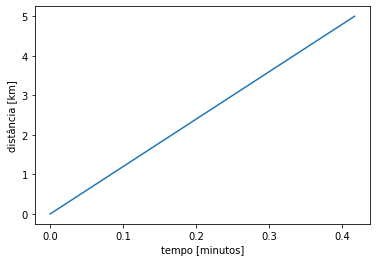

In [5]:
#Exercício 1
import matplotlib.pyplot as plt

def get_positions(start, velocity, distance, delta_t):
    result = {
        'positions': [start],
        'times': [0]
    }
    while result['positions'][-1] < distance:
        result['positions'].append(result['positions'][-1] + velocity*delta_t)
        result['times'].append(result['times'][-1] + delta_t)
    return result

def plot_graph(x, y, label_x, label_y):
    plt.plot(x,y)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

plot_values = get_positions(0, 12, 5, 1/60)

plot_graph(plot_values['times'], plot_values['positions'], 'tempo [minutos]', 'distância [km]')

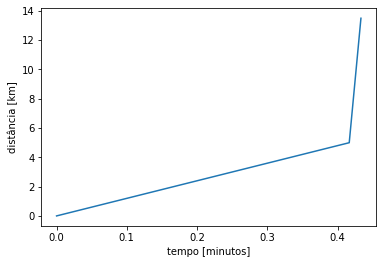

In [6]:
#Exercício 3
import matplotlib.pyplot as plt
import math

runner = {
    'position': [0],
    'time': [0]
}

#First run configs
initial_position1 = 0
end_position1 = 5
velocity1 = 12

#First run code
def runner_part1(time):
    position = initial_position1 + velocity1*time
    
    if position <= end_position1:
        return position
    else:
        return False

#Second run configs
end_position2 = 5.2
end_velocity2 = 15
aceleration2 = (end_velocity2 - velocity1)/(end_position2 - end_position1)

#Second run code
def runner_part2(time):
    position = end_position1 + velocity1*time + aceleration2*time**2/2
    
    if position <= end_position2:
        return position
    else:
        return False

#Third run configs
initial_position3 = 5.2

#Third run code
def runner_part3(time):
    position = initial_position3 + end_velocity2*time
    return position


#Configs about graph
steps = 1/60
initial_position3 = 7

#Do calculus
while runner['position'][-1] <= initial_position3:
    #Get time
    runner['time'].append(runner['time'][-1] + steps)

    #Get position
    if runner_part1(runner['time'][-1]):
        runner['position'].append(runner_part1(runner['time'][-1]))
    elif runner_part2(runner['time'][-1]):
        runner['position'].append(runner_part2(runner['time'][-1]))
    else:
        runner['position'].append(runner_part3(runner['time'][-1]))

#Plot graph
def plot_graph(x, y, label_x, label_y):
    plt.plot(x,y)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

plot_graph(runner['time'], runner['position'], 'tempo [minutos]', 'distância [km]')

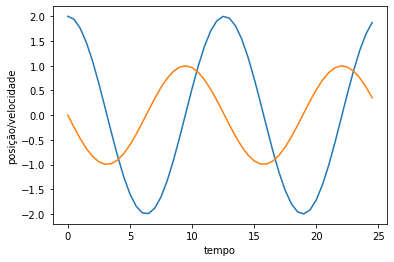

In [7]:
#Exercício 3
import matplotlib.pyplot as plt
import math

#Configs about pendulum
length = 1
gravity = 9.8
amplitude = 2
fase_inicial = 0

#Pendulum initial positions
pendulum = {
    'position_x': [],
    'velocity_x': [],
    'time': []
}

#Configs about graph
n_points = 50
steps = 0.5

#Do calculus
for i in range(n_points):
    omega = 1/(2*math.pi)*math.sqrt(gravity/length)

    pendulum['time']      .append(i*steps)
    pendulum['position_x'].append(       amplitude*math.cos(omega*pendulum['time'][-1] + fase_inicial))
    pendulum['velocity_x'].append(-omega*amplitude*math.sin(omega*pendulum['time'][-1] + fase_inicial))

#Plot graph
def plot_graph(x, y, label_x, label_y):
    plt.plot(x,y)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

plot_graph(pendulum['time'], pendulum['position_x'], 'tempo', 'posição/velocidade')
plot_graph(pendulum['time'], pendulum['velocity_x'], 'tempo', 'posição/velocidade')